# Plot Fluorescence Data

Plot fluorescence profiles from cell tracks exported by TrackMate

We begin by importing the necessary packages:

In [3]:
import random

import matplotlib.pyplot as plt
import pandas as pd
import glob

Load the data and sort it:

In [4]:
# Constants
POSITION = 0
NUM_TRACKS = 2  # Number of tracks to plot; set to None or 0 to plot all tracks
INPUT_DIR = 'Z:/working/Training/2024-Crick Microscopy Course/Live imaging/trial data/Prelim_analysis_2'

file_paths = glob.glob(f'{INPUT_DIR}/Pos{POSITION}/*_Pos{POSITION}_spots.csv')

# Read and preprocess data
data = pd.read_csv(file_paths[0], skiprows=[1, 2, 3])
data.sort_values(by=['TRACK_ID', 'FRAME'], ignore_index=True, inplace=True)

Extract the relevant columns:

In [5]:
intensity_data = data[['FRAME', 'TRACK_ID', 'MEAN_INTENSITY_CH2', 'MEAN_INTENSITY_CH3']]
unique_tracks = intensity_data['TRACK_ID'].unique()

Select some tracks at random:

In [6]:
# Check NUM_TRACKS does not exceed available tracks
if NUM_TRACKS is None or NUM_TRACKS <= 0:
    selected_tracks = unique_tracks
else:
    NUM_TRACKS = min(NUM_TRACKS, len(unique_tracks))
    selected_tracks = random.sample(list(unique_tracks), NUM_TRACKS)

Plot the selected fluorescence profiles

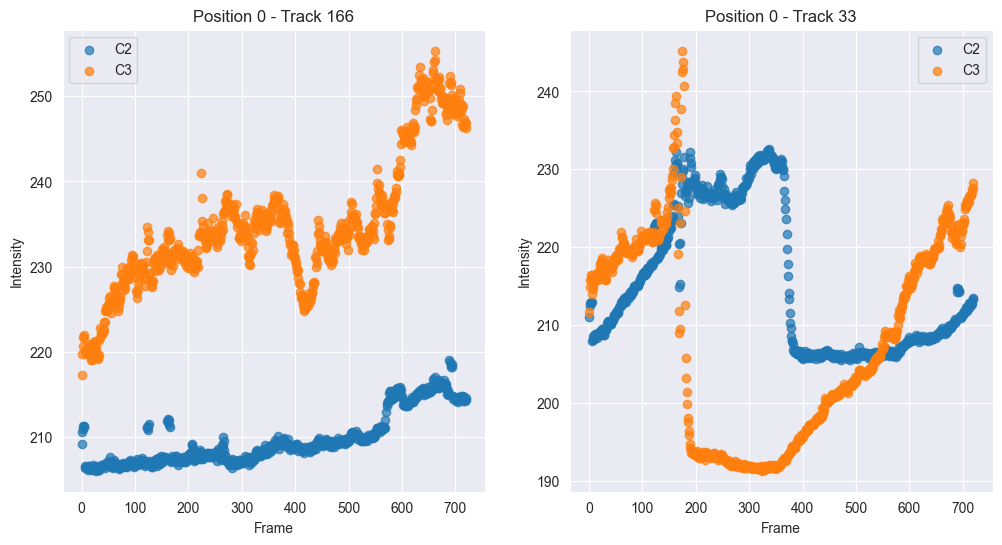

In [7]:
# Determine layout for subplots
num_cols = 2  # Number of columns for subplots
num_rows = (len(selected_tracks) + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()  # Flatten in case of a grid, even if it's a single row or column

for i, track in enumerate(selected_tracks):
    ax = axes[i]
    track_data = intensity_data[intensity_data['TRACK_ID'] == track]
    ax.scatter(track_data['FRAME'], track_data['MEAN_INTENSITY_CH2'], label=f'C2', alpha=0.7)
    ax.scatter(track_data['FRAME'], track_data['MEAN_INTENSITY_CH3'], label=f'C3', alpha=0.7)
    ax.set_title(f'Position {POSITION} - Track {track}')
    ax.set_xlabel('Frame')
    ax.set_ylabel('Intensity')
    ax.legend()

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()